# <font color="blue">Performing OCR on Invoice Documents</font>

We will look at an image of the invoice and finds the following:

1. The Billing Amount
1. Sender and Receiver Email IDs

## <font color="blue">Import Libraries.</font>

In [1]:
import pytesseract
import keras_ocr
import matplotlib.pyplot as plt
import cv2
import numpy as np

## <font color="blue">Read and display the Test Image</font>

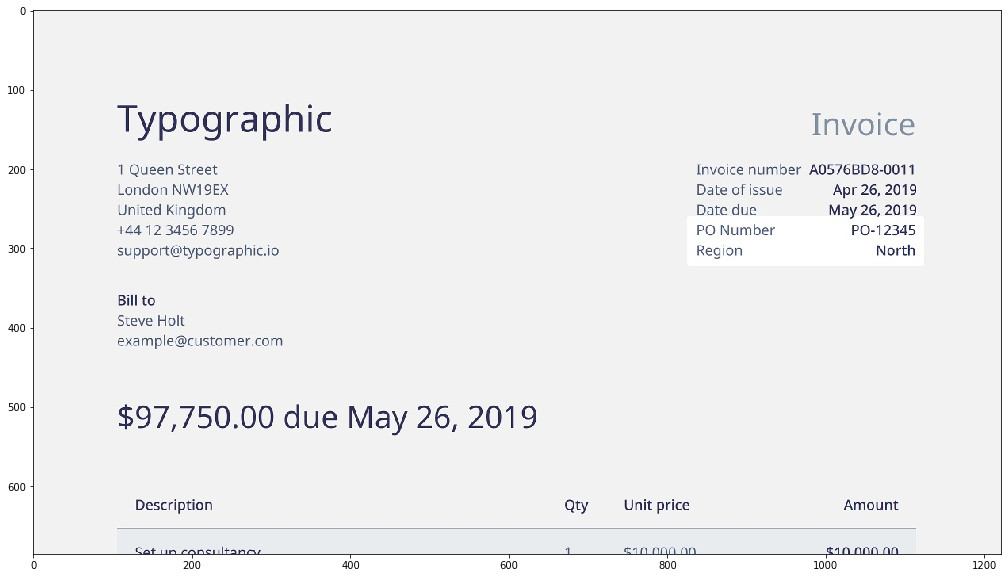

In [2]:
doc_img = cv2.imread('../resource/asnlib/publicdata/invoice.jpg', cv2.IMREAD_COLOR)
fig = plt.figure(figsize=(20, 10))
plt.imshow(doc_img[:,:,::-1])
plt.show()

## <font color="blue">Perform OCR</font>

In [3]:
def tess_recognize_from_boxes(image, detections, config):
    predictions = []
    # for each box
    for i, box in enumerate(detections):
        # get the cropped and algned image
        cropped_warped = keras_ocr.tools.warpBox(image, box)
    
        # Perform tesseract OCR on the cropped Text
        text = pytesseract.image_to_string(cropped_warped, config=config)
        
        # Store the text and the corresponding box 
        if text:
            predictions.append((text, box))
    return predictions  

def modified_tesseract(image, config=('--psm 6')):
    # Detect the Text boxes from the image using Keras-ocr
    detections = detector.detect([image])[0]
    
    # Run tesseract on boxes defined above
    predictions = tess_recognize_from_boxes(image, detections, config)
  
    return predictions

In [4]:
detector = keras_ocr.detection.Detector()

Looking for /mnt/data2/students/sub2/ccc_v1_w_2e74d_42842/asn138717_9/asn138718_1/work/.keras-ocr/craft_mlt_25k.h5


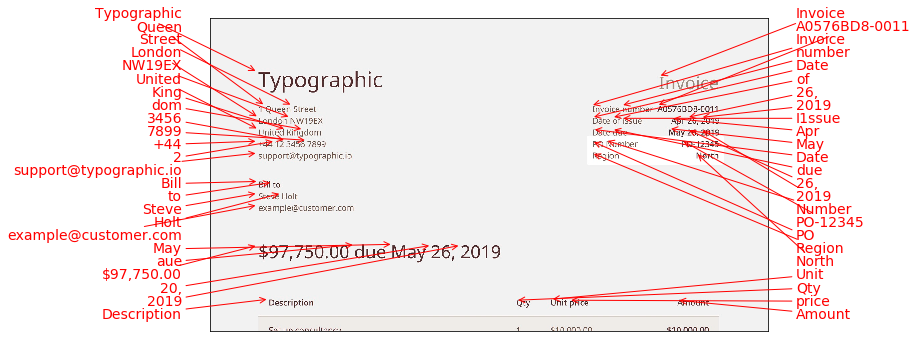

In [6]:
image = cv2.imread('../resource/asnlib/publicdata/invoice.jpg')

kernel = np.ones((2,2),np.uint8)
processed_image = cv2.erode(image, kernel, iterations = 1)
detections = detector.detect([processed_image])[0]

image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
predictions = tess_recognize_from_boxes(image_gray, detections, ('--psm 6'))

fig, ax = plt.subplots(figsize = [10,10])

keras_ocr.tools.drawAnnotations(image, predictions,ax=ax)

plt.imshow(image)

In [7]:
words = [prediction[0] for prediction in predictions]

email_ids = [email for email in words if '@' in email]
billing_amount = [amount for amount in words if '$' in amount]

print("Extracted Billing Amount:")
print(billing_amount[0], '\n')
print("Extracted EMail IDs:")
for email_id in email_ids:
    print(email_id)

Extracted Billing Amount:
$97,750.00 

Extracted EMail IDs:
support@typographic.io
example@customer.com
